# Sistemas de recomendación en plataformas audiovisuales

Introducción a la optimización  
_Universidad Nacional de Colombia, Sede Bogotá_  
2022-I

Ana Paulina Castillo Velásquez  
ancastillov@unal.edu.co

Sebastian Leonardo Molina Diaz  
smolinad@unal.edu.co

Laura Natalia Suarez Montilla  
lsuarezmo@unal.edu.co

 


# Introducción


Un sistema de recomendación es un conjunto de herramientas y técnicas que proveen un ítem como sugerencia para el usuario, por ejemplo música, productos o aplicaciones. El desarrollo de estos sistemas de recomendación es multidisciplinar en áreas como optimización, inteligencia artificial y estadística, y son fuertemente usados en la industria de multimedia y del comercio en línea. 

Los sistemas de recomendación han estado en desarrollo desde inicios de la década de 1990. Sin embargo, su extendido uso e investigación tiene lugar a partir de 2006, fecha en la que se da a conocer *Netflix Prize*. Esta fue una competencia que Netflix lanzó con el fin de mejorar las predicciones que su sistema hacía en cuanto a las películas que sugería a los usuarios de esta plataforma, y que otorgaba un premio económico al ganador. Con esta iniciativa se hace evidente la importancia de los sistemas de recomendación, ya que, para el caso en mención, mejores sugerencias de películas representaban no solo usuarios satisfechos que permanecerían usando la plataforma, sino mayor efectividad para atrapar a nuevos usuarios. Esta estrategia se puede aplicar en general para los diversos mercados en línea.

Dentro de los sistemas de recomendación hay dos tipos destacables; basados en contenido, y filtrado colaborativo. Los primeros crean perfiles tanto para los usuarios como para los productos, de modo que se sugieren aquellos productos cuyo perfil se parezca más al del usuario objetivo. Los últimos esencialmente se basan en calificaciones que usuarios parecidos al usuario objetivo han dado a determinados productos, para predecir la respuesta que tendrá ante estos el usuario objetivo.

Una de las técnicas más comunes en el empleo de filtrado colaborativo es realizar modelos basados en vecindades, las cuales constarán de los $k$ productos o usuarios más cercanos. A pesar de que este método es útil, presenta algunos problemas como: por lo general recomienda los productos más populares, lo que deriva en falta de personalización para cada usuario y dificultad de inclusión en las sugerencias para un producto nuevo, debido a que no presenta interacciones. Además, presenta dificultades para escalar a conjuntos con muchos más usuarios y productos.

Este proyecto busca analizar una aplicación particular de un sistema de recomendación en plataformas audiovisuales, que se basa en el filtrado colaborativo, con la técnica de factorización de matrices, con lo que se espera mejorar en los problemas mencionados anteriormente. Mostraremos el algoritmo paso a paso, su implementación en código y el fundamento teórico matemático detrás de este. 

Presentamos a continuación un esquema con la idea general del funcionamiento de un sistema de recomendación.

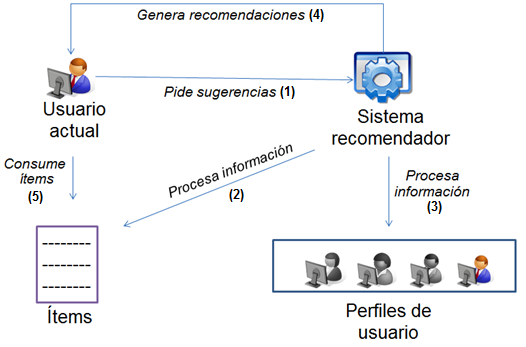

Imagen tomada de [12.].

## Filtro colaborativo 



Para el empleo de este sistema, usaremos una matriz de calificación, que es una representación acerca del gusto de los usuarios y las descripciones de los productos a calificar. En las columnas de dicha matriz ubicaremos los usuarios, y en las filas el producto de la plataforma; para hacer un ejemplo, los productos serán peliculas. Esta matriz creada $A$ tiene como elemento $a_{i,j}$ la calificación de la película $i$ por parte del usuario $j$. 

- La cantidad de películas que se enlista en estas matrices es muy grande, pero pocos los usuarios que califican cada uno de ellos. Así, obtenemos una matriz dispersa —con casi todas las entradas nulas—. 
- Queremos encontrar una factorización de esta matriz de tal forma que nos facilite recomendar a un usuario $k$ una película con base a las que han sido calificadas. Así, necesario encontrar un algoritmo que facilite dicha labor.

![Ejemplo de una matriz dispersa de calificaciones de películas](https://miro.medium.com/max/1400/1*rvCsSPh2EHj-B2HFwAgwmg.png)

### Observaciones

- En ocasiones, las escalas en las que los usuarios dan una calificación de un producto varían entre usuarios. Para solventar estas diferencias, se hace uso de un proceso de normalización, de manera que todos los datos a considerar se encuentren en un mismo tipo y rango de calificación.

- Los procesos de normalización permiten que las calificaciones que dan los usuarios tengan igual peso entre uno y otro, en lugar de privilegiar las de algunos, como ocurriría si se consideran diferentes escalas.

- Además, procesos de este estilo permiten observar cuando la valoración de un usuario a determinado producto representa una diferencia, bien sea positiva o negativa, respecto a las que el usuario da usualmente, es decir a sus calificaciones promedio.

## Factorización de matrices y reducción 

- Queremos ver la matriz usuario-ítem como el producto de dos matrices rectangulares de menor dimensión a la original. Una de ellas denominada como la matriz de usuarios, donde las filas representan a los usuarios y las columnas a los factores, y la otra matriz es la matriz de películas, donde las filas representan factores y las columnas representan películas. Por ejemplo, estos factores pueden ser las temáticas.


- Esta factorización nos permite predecir el valor que tendría cada casilla incógnita de nuestra matriz usuario-películas, creando recomendaciones que otorgan una importancia similar entre películas que pueden no ser tan conocidas versus las más populares.

La calificación del elemento $i$ dada por el usuario $u$ se puede expresar, gracias a la factorización de la matriz original, como un producto escalar del vector del usuario de la primera matriz y el vector del elemento de la segunda. Matematicamente esto se puede ver como:

$$
\operatorname{Rating}_{u i} = \operatorname{User}_{u} \cdot \operatorname{Movies}_{i} =\sum_{k=0}^{n} \operatorname{User}_{u,k} \cdot \operatorname{Movies}_{k,i},
$$

donde $n$ es el número de factores.

Si denotamos con $R$ a la matriz original de usuario-Item y $A$ el producto de las matrices $\operatorname{User}=U$ y $\operatorname{Movies}=M$, nuestro objetivo es 

$$\operatorname{min}_{\text{ }U,M}\|R-A\|.$$


Esto se asemeja a la propuesta del tercer lugar del concurso *Netflix Prize*, Simon Funk, quien tenía el mismo objetivo del presente proyecto. (Para más información al respecto, consultar [6]) 

Por tal motivo nuestra función objetivo es la siguiente:

$$\operatorname{min}_{A}
\sqrt{\sum_{(i, j) \in S}\left(r_{i j}-a_{i j}\right)^{2}}
=\operatorname{min}_{U,M}
\sqrt{\sum_{(i, j) \in S}\left(r_{i j}-  ∑_{k=0}^{n}u_{i,k}⋅m_{k,j} \right)^{2}}$$

Lo cual plantea una minimización con la norma de Frobenius. 

Usamos esta norma ya que mide la distancia entre matrices, y a diferencia de otras normas —como la norma $L_1$ o la norma $L_\infty$—, la norma de Frobenius es diferenciable con respecto a las entradas individuales de $A$ (mientras $A \neq 0$ ), lo que nos permite utilizar métodos basados en gradientes para optimizar la norma, lo cual veremos más adelante. Nótese que este problema no es convexo, para más información consultar [9].

## Gradiente Descendente

El descenso de gradiente estocástico es un método iterativo para optimizar una función objetivo con propiedades de diferenciabilidad o casi-diferenciabilidad. Este método reemplaza el gradiente real de nuestra función por una aproximación de la misma a partir de datos seleccionados al azar. 

### Ejemplo

Veamos un ejemplo del gradiente descendente, tomado de
https://www.codificandobits.com/blog/el-gradiente-descendente/:

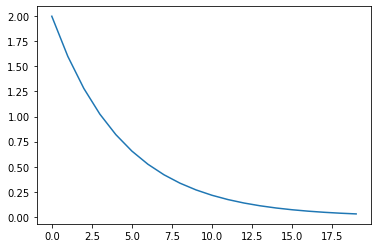

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def gradiente_descendente(gradiente, inicio, tasa_aprendizaje, iteracion=20, tolerancia=1e-03):
  x_puntos = []
  vector = inicio
  for _ in range(iteracion):
    x_puntos.append(vector)
    diferencia = - tasa_aprendizaje * gradiente(vector)
    if np.all(np.abs(diferencia))<= tolerancia:
      break
    vector += diferencia
  return vector, np.array(x_puntos)

vector,x_puntos = gradiente_descendente(gradiente = lambda v:  2*v, inicio=2.0, tasa_aprendizaje = 0.1)

plt.plot(x_puntos);

- Aquí vemos cómo el punto mínimo de esta función se encontrará cuando $x=0$

- Matemáticamente hablando, el problema puede escribir así:

$$
x_{(i)}=x_{(i-1)}-\alpha_{i} \nabla f_{i}(x_{i-1})
$$

Donde $\alpha_i$ es la constante de aprendizaje del algoritmo



# Solución del problema 

Consideremos la matriz $A=U\cdot M$, nuestro objetivo es contruir las matrices $U$ y $M$, esto lo haremos a partir del gradiente descendiente y  a partir del planteamiento hecho por Simon Funk, mencionado en la sección anterior. Sea $F(U,M) = U\cdot M$, esta función será la que aplicaremos el algoritmo, donde

$$
\begin{align*}
U_{k+1}&=U_{k}-\lambda \nabla_{U} f\left(U_{k}, M_{k}\right) \\
M_{k+1}&=M_{k}-\lambda \nabla_{M} f\left(M_{k}, M_{k}\right)
\end{align*}.
$$

Particularmente, para hallar los elementos $(i,j)$ de ambas matrices obtendremos

$$
\begin{align*}
\frac{\partial f(U, M)}{\partial u_{i p}}&=-2 \sum_{\{i:(i, j) \in S\}}\left(r_{i j}-\sum_{k=1}^{s} u_{i k} m_{k j}\right) \cdot m_{p j} \\
\frac{\partial f(U, M)}{\partial m_{p j}}&=-2 \sum_{\{j:(i, j) \in S\}}\left(r_{i j}-\sum_{k=1}^{s} u_{i k} m_{k j}\right) \cdot u_{i p}
\end{align*},
$$

considerando $s$ el rango de la matriz $A$. Así, los elementos en la iteración $k$ en las posiciones $(i,p)$ y $(p,j)$ de las matrices respectivas se pueden escribir como

$$
\begin{align*}
u_{i p}^{(k+1)}&=u_{i p}^{(k)}+2 \lambda \sum_{\{i:(i, j) \in S\}}\left(r_{i j}-\sum_{k=1}^{s} u_{i k} m_{k j}\right) \cdot m_{p j} \\
m_{p j}^{(k+1)}&=m_{p j}^{(k)}+2 \lambda \sum_{\{j:(i, j) \in S\}}\left(r_{i j}-\sum_{k=1}^{s} u_{i k} m_{k j}\right) \cdot u_{i p}
\end{align*}
$$

Lo anterior nos permite construir las matrices $U,M$ de manera iterativa. En este punto se hace necesario analizar cuántas iteraciones serán utilzadas dado que este sistema, si bien es óptimo en comparación con otros,  puede llegar a tener un costo computacional elevado.


El siguiente diagrama sintetiza el funcionamiento del sistema de recomendación que vamos a emplear.

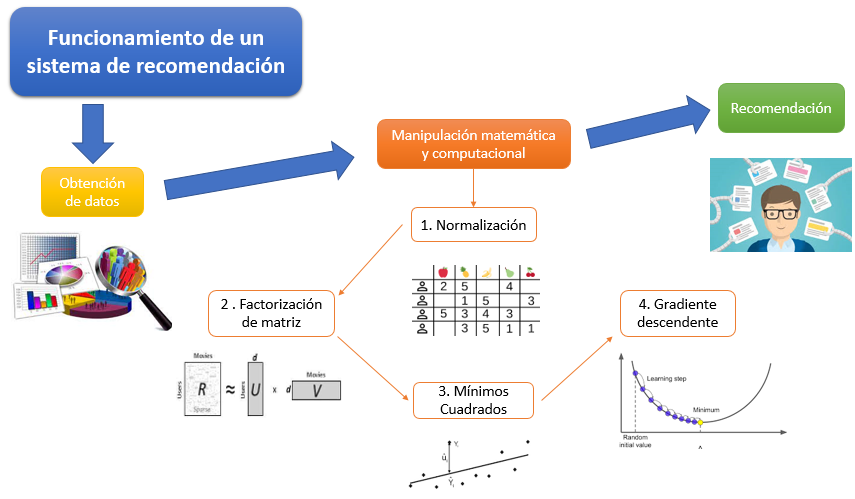

## Base de datos

- La base de datos fue obtenida de [MovieLens](https://grouplens.org/datasets/movielens/latest/).
- Describe las calificaciones en un rango de 0 a 5 estrellas. 
- Contiene 100 000 calificaciones y 3600 clasificaciones en 9000 películas.
- Estos datos fueron recolectados por 600 usuarios entre el 9 de enero de 1995 y el 26 de septiembre de 2018.
- Todos los usuarios de la lista tienen al menos 20 calificaciones de peliculas, estos están identificados con un numero de usuario.
- Esta base de datos fue elegida dado que ya estaba ordenada por el *id* del usuario y por pelicula, facilitando el tratamiento respecto a si se usaran otras bases que que no hubieran sido manipuladas.

In [ ]:
import os
import time

# spark imports
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import UserDefinedFunction, explode, desc
from pyspark.sql.types import StringType, ArrayType
from pyspark.mllib.recommendation import ALS

# data science imports
import math
import numpy as np
import pandas as pd

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# spark config
spark = SparkSession \
    .builder \
    .appName("movie recommendation") \
    .config("spark.driver.maxResultSize", "96g") \
    .config("spark.driver.memory", "96g") \
    .config("spark.executor.memory", "8g") \
    .config("spark.master", "local[12]") \
    .getOrCreate()
# get spark context
sc = spark.sparkContext

In [ ]:
# path config
data_path = os.path.join("/content/drive/Shareddrives/Database", 'movielens')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Realizamos una inspección básica de los datos que usaremos, donde observamos algunas películas, id asignadas, etiquetas y calificaciones.

In [ ]:
movies = spark.read.load('/content/drive/Shareddrives/Database/movielens/movies.csv', format='csv', header=True, inferSchema=True)
ratings = spark.read.load('/content/drive/Shareddrives/Database/movielens/ratings.csv', format='csv', header=True, inferSchema=True)
links = spark.read.load('/content/drive/Shareddrives/Database/movielens/links.csv', format='csv', header=True, inferSchema=True)
tags = spark.read.load('/content/drive/Shareddrives/Database/movielens/tags.csv', format='csv', header=True, inferSchema=True)

In [ ]:
movies.show(3)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
+-------+--------------------+--------------------+
only showing top 3 rows



In [ ]:
ratings.show(3)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
+------+-------+------+---------+
only showing top 3 rows



In [ ]:
links.show(3)

+-------+------+------+
|movieId|imdbId|tmdbId|
+-------+------+------+
|      1|114709|   862|
|      2|113497|  8844|
|      3|113228| 15602|
+-------+------+------+
only showing top 3 rows



In [ ]:
tags.show(3)

+------+-------+---------------+----------+
|userId|movieId|            tag| timestamp|
+------+-------+---------------+----------+
|     2|  60756|          funny|1445714994|
|     2|  60756|Highly quotable|1445714996|
|     2|  60756|   will ferrell|1445714992|
+------+-------+---------------+----------+
only showing top 3 rows



Verificamos los posibles valores que pueden tomar las calificaciones que los usuarios dan a las películas.

In [ ]:
print('Distinct values of ratings:')
print(sorted(ratings.select('rating').distinct().rdd.map(lambda r: r[0]).collect()))

Distinct values of ratings:
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


Verificamos la cantidad mínima de películas que ha calificado cada usuario y la cantidad mínima de calificaciones que ha recibido cada película que los usuarios han valorado.

In [ ]:
tmp1 = ratings.groupBy("userID").count().toPandas()['count'].min()
tmp2 = ratings.groupBy("movieId").count().toPandas()['count'].min()
print('For the users that rated movies and the movies that were rated:')
print('Minimum number of ratings per user is {}'.format(tmp1))
print('Minimum number of ratings per movie is {}'.format(tmp2))

For the users that rated movies and the movies that were rated:
Minimum number of ratings per user is 20
Minimum number of ratings per movie is 1


Vemos que la mayoría de las películas ha sido calificada por más de un usuario, lo cual es un aspecto positivo puesto que se disminuye la cantidad de celdas en blanco que tendrá la matriz.

In [ ]:
tmp1 = sum(ratings.groupBy("movieId").count().toPandas()['count'] == 1)
tmp2 = ratings.select('movieId').distinct().count()
print('{} out of {} movies are rated by only one user'.format(tmp1, tmp2))

3446 out of 9724 movies are rated by only one user


Observamos el tamaño de la matriz con la que vamos a trabajar, considerando el número de usuarios y de películas. Como se verá, ambas dimensiones resultan de un tamño considerable, lo cual es una razón más para emplear el método de factorización de matrices que mencionamos previamente ya que, por ejemplo, con una estrategia de vecindades, tamaños muy grabdes en las matrices complican la efectividad y velocidad de la misma.

In [ ]:
tmp = ratings.select('userID').distinct().count()
print('We have a total of {} distinct users in the data sets'.format(tmp))

We have a total of 610 distinct users in the data sets


In [ ]:
tmp = movies.select('movieID').distinct().count()
print('We have a total of {} distinct movies in the data sets'.format(tmp))

We have a total of 9742 distinct movies in the data sets


Comprobamos que casi todas las películas con las que vamos a trabajar hayan sido calificados por algún usuario, de manera que aporten información que resultara útil para el tratamiento de los datos y las sugerencias que se brindarán.

In [ ]:
tmp1 = movies.select('movieID').distinct().count()
tmp2 = ratings.select('movieID').distinct().count()
print('We have a total of {} distinct movies that are rated by users in ratings table'.format(tmp2))
print('We have {} movies that are not rated yet'.format(tmp1-tmp2))

We have a total of 9724 distinct movies that are rated by users in ratings table
We have 18 movies that are not rated yet


In [ ]:

movies.createOrReplaceTempView("movies")
ratings.createOrReplaceTempView("ratings")
print('List movies that are not rated yet: ')

spark.sql(
    "SELECT movieId, title "
    "FROM movies "
    "WHERE movieId NOT IN (SELECT distinct(movieId) FROM ratings)"
).show(10)


List movies that are not rated yet: 
+-------+--------------------+
|movieId|               title|
+-------+--------------------+
|   1076|Innocents, The (1...|
|   2939|      Niagara (1953)|
|   3338|For All Mankind (...|
|   3456|Color of Paradise...|
|   4194|I Know Where I'm ...|
|   5721|  Chosen, The (1981)|
|   6668|Road Home, The (W...|
|   6849|      Scrooge (1970)|
|   7020|        Proof (1991)|
|   7792|Parallax View, Th...|
+-------+--------------------+
only showing top 10 rows



Con la siguiente función, obtenemos una lista de géneros de las películas de la base de datos. Esta funcionalidad es importante ya que permite

In [ ]:
# define a udf for splitting the genres string
splitter = UserDefinedFunction(lambda x: x.split('|'), ArrayType(StringType()))
# query
print('All distinct genres: ')
movies.select(explode(splitter("genres")).alias("genres")).distinct().show()

All distinct genres: 
+------------------+
|            genres|
+------------------+
|             Crime|
|           Romance|
|          Thriller|
|         Adventure|
|             Drama|
|               War|
|       Documentary|
|           Fantasy|
|           Mystery|
|           Musical|
|         Animation|
|         Film-Noir|
|(no genres listed)|
|              IMAX|
|            Horror|
|           Western|
|            Comedy|
|          Children|
|            Action|
|            Sci-Fi|
+------------------+



In [ ]:
print('Counts of movies per genre')
movies.select('movieID', explode(splitter("genres")).alias("genres")) \
    .groupby('genres') \
    .count() \
    .sort(desc('count')) \
    .show()

Counts of movies per genre
+------------------+-----+
|            genres|count|
+------------------+-----+
|             Drama| 4361|
|            Comedy| 3756|
|          Thriller| 1894|
|            Action| 1828|
|           Romance| 1596|
|         Adventure| 1263|
|             Crime| 1199|
|            Sci-Fi|  980|
|            Horror|  978|
|           Fantasy|  779|
|          Children|  664|
|         Animation|  611|
|           Mystery|  573|
|       Documentary|  440|
|               War|  382|
|           Musical|  334|
|           Western|  167|
|              IMAX|  158|
|         Film-Noir|   87|
|(no genres listed)|   34|
+------------------+-----+



En este caso usaremos las columnas ```userId```, ```movieId``` y ```rating```, por lo cual el único factor latente será la calificación de las películas.

In [ ]:
# load data
movie_rating = sc.textFile(os.path.join(data_path, 'ratings.csv'))

# preprocess data -- only need ["userId", "movieId", "rating"]
header = movie_rating.take(1)[0]
rating_data = movie_rating \
    .filter(lambda line: line!=header) \
    .map(lambda line: line.split(",")) \
    .map(lambda tokens: (int(tokens[0]), int(tokens[1]), float(tokens[2]))) \
    .cache()
    
# check three rows
rating_data.take(3)

[(1, 1, 4.0), (1, 3, 4.0), (1, 6, 4.0)]

Por último, se divide la base de datos en sus correspondientes secciones de entrenamiento, validación y prueba para evitar el *overfitting* sobre la base de datos original. En este caso se usará una distribución 60-20-20, la cual es una distribución estándar para el proceso de entrenamiento, validación y prueba del modelo.

In [ ]:
train = rating_data.sample(False, 0.3, seed=3)
validation = rating_data.sample(False, 0.1, seed=57)
test = rating_data.sample(False, 0.1, seed=21)

train.cache()
validation.cache()
test.cache()

PythonRDD[30335] at RDD at PythonRDD.scala:53

## Implementación


### Alternating Least Squares (Mínimos cuadrados alternantes)

La descomposición en valores singulares es la manera natural para aproximar la matriz de usuarios $U$ en el producto de dos matrices, como se explicó en secciones anteriores. Usar este tipo de descomposición es equivalente a minimizar la raíz del error cuadrático medio (RMSE) sobre todos los elementos de la matriz de usuarios $U$. Sin embargo, debido a la cantidad de iteraciones que implica usar SVD, se procede a usar el algoritmo de mínimos cuadrados alternantes —abreviado ALS—. 

El algoritmo ALS consiste de los siguientes pasos:

1. Se inicializa la matriz $M$ asignando la calificación promedio para la película en la primera fila y el resto se llena con valores aleatorios pequeños.
2. Fijando $M$, se encuentra $U$ solucionando la función objetivo encontrada en las secciones anteriores.
3. Fijando $U$, se encuentra $M$ de manera similar al paso anterior.
4. Iterar los pasos 2 y 3 hasta satisfacer algún criterio de parada.

Este algoritmo está implementado haciendo uso de ```pyspark```, y de sus implementaciones para ```ALS``` y del error cuadrático medio ```MSE```.

In [ ]:
def train_ALS(train_data, validation_data, num_iters, reg_param, ranks):
    """
    Grid Search Function to select the best model based on RMSE of hold-out data
    """
    
    # initial
    min_error = float('inf')
    best_rank = -1
    best_regularization = 0
    best_model = None
    for rank in ranks:
        for reg in reg_param:
            # train ALS model
            model = ALS.train(
                ratings=train_data,    
                iterations=num_iters,
                rank=rank,
                lambda_=reg,          
                seed=99)
            # make prediction
            valid_data = validation_data.map(lambda p: (p[0], p[1]))
            predictions = model.predictAll(valid_data).map(lambda r: ((r[0], r[1]), r[2]))
            # get the rating result
            ratesAndPreds = validation_data.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
            # get the RMSE
            MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
            error = math.sqrt(MSE)
            print('{} latent factors and regularization = {}: validation RMSE is {}'.format(rank, reg, error))
            if error < min_error:
                min_error = error
                best_rank = rank
                best_regularization = reg
                best_model = model
    print('\nThe best model has {} latent factors and regularization = {}'.format(best_rank, best_regularization))
    return best_model

Se debe tener en cuenta que si el número de factores latentes (o parámetros sobre los que se minimiza) es muy grande, entonces este tipo de modelo suele hacer *overfitting*. Las razones técnicas por las que esto pasa se pueden encontrar en [11]. Por esta razón se usa una parametrización con el fin de penalizar parámetros grandes. El método usado para solucionar este problema se denomina regularización de Tikhonov. Procedemos a ejecutar el algoritmo con los datos de entrenamiento.

In [ ]:
# hyper-param config
num_iterations = 1
ranks = [8, 10, 12, 14, 16]
reg_params = [0.001, 0.01, 0.05, 0.1, 0.2]

# grid search and select best model
start_time = time.time()
final_model = train_ALS(train, validation, num_iterations, reg_params, ranks)

print ('Total Runtime: {:.2f} seconds'.format(time.time() - start_time))

8 latent factors and regularization = 0.001: validation RMSE is 5.852596685097858
8 latent factors and regularization = 0.01: validation RMSE is 4.378586405276328
8 latent factors and regularization = 0.05: validation RMSE is 3.653419921412804
8 latent factors and regularization = 0.1: validation RMSE is 3.4638870253791763
8 latent factors and regularization = 0.2: validation RMSE is 3.317103586530452
10 latent factors and regularization = 0.001: validation RMSE is 5.021902456253509
10 latent factors and regularization = 0.01: validation RMSE is 3.9507763775821636
10 latent factors and regularization = 0.05: validation RMSE is 3.3982718406076695
10 latent factors and regularization = 0.1: validation RMSE is 3.1998069582565827
10 latent factors and regularization = 0.2: validation RMSE is 3.0547724544582726
12 latent factors and regularization = 0.001: validation RMSE is 5.068344994899171
12 latent factors and regularization = 0.01: validation RMSE is 4.0510423172304915
12 latent factor

In [ ]:
def plot_learning_curve(arr_iters, train_data, validation_data, reg, rank):
    """
    Plot function to show learning curve of ALS
    """
    errors = []
    for num_iters in arr_iters:
        # train ALS model
        model = ALS.train(
            ratings=train_data,    # (userID, productID, rating) tuple
            iterations=num_iters,
            rank=rank,
            lambda_=reg,           # regularization param
            seed=99)
        # make prediction
        valid_data = validation_data.map(lambda p: (p[0], p[1]))
        predictions = model.predictAll(valid_data).map(lambda r: ((r[0], r[1]), r[2]))
        # get the rating result
        ratesAndPreds = validation_data.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
        # get the RMSE
        MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
        error = math.sqrt(MSE)
        # add to errors
        errors.append(error)

    # plot
    plt.figure(figsize=(12, 6))
    plt.plot(arr_iters, errors)
    plt.xlabel('number of iterations')
    plt.ylabel('RMSE')
    plt.title('ALS Learning Curve')
    plt.grid(True)
    plt.show()

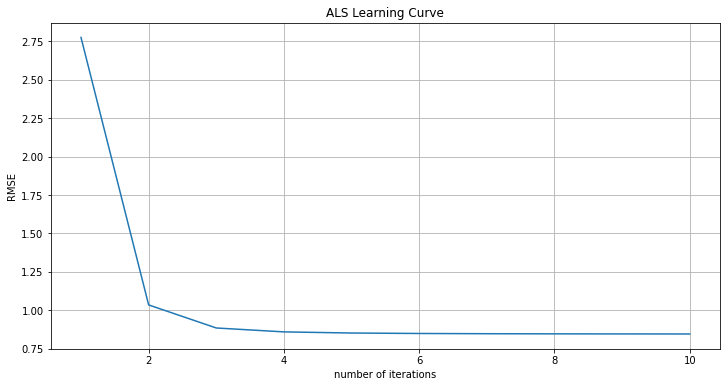

In [ ]:
plot_learning_curve(list(range(1, 11)), train, validation, 0.2, 14)

In [ ]:
# make prediction using test data
test_data = test.map(lambda p: (p[0], p[1]))
predictions = final_model.predictAll(test_data).map(lambda r: ((r[0], r[1]), r[2]))
# get the rating result
ratesAndPreds = test.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
# get the RMSE
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
error = math.sqrt(MSE)
print('The out-of-sample RMSE of rating predictions is', round(error, 4))

The out-of-sample RMSE of rating predictions is 2.762


## 

In [ ]:
def get_movieId(df_movies, fav_movie_list):
    """
    return all movieId(s) of user's favorite movies
    
    Parameters
    ----------
    df_movies: spark Dataframe, movies data
    
    fav_movie_list: list, user's list of favorite movies
    
    Return
    ------
    movieId_list: list of movieId(s)
    """
    movieId_list = []
    for movie in fav_movie_list:
        movieIds = df_movies \
            .filter(movies.title.like('%{}%'.format(movie))) \
            .select('movieId') \
            .rdd \
            .map(lambda r: r[0]) \
            .collect()
        movieId_list.extend(movieIds)
    return list(set(movieId_list))

In [ ]:
def add_new_user_to_data(train_data, movieId_list, spark_context):
    """
    add new rows with new user, user's movie and ratings to
    existing train data

    Parameters
    ----------
    train_data: spark RDD, ratings data
    
    movieId_list: list, list of movieId(s)

    spark_context: Spark Context object
    
    Return
    ------
    new train data with the new user's rows
    """
    # get new user id
    new_id = train_data.map(lambda r: r[0]).max() + 1
    # get max rating
    max_rating = train_data.map(lambda r: r[2]).max()
    # create new user rdd
    user_rows = [(new_id, movieId, max_rating) for movieId in movieId_list]
    new_rdd = spark_context.parallelize(user_rows)
    # return new train data
    return train_data.union(new_rdd)

In [ ]:
def get_inference_data(train_data, df_movies, movieId_list):
    """
    return a rdd with the userid and all movies (except ones in movieId_list)

    Parameters
    ----------
    train_data: spark RDD, ratings data

    df_movies: spark Dataframe, movies data
    
    movieId_list: list, list of movieId(s)

    Return
    ------
    inference data: Spark RDD
    """
    # get new user id
    new_id = train_data.map(lambda r: r[0]).max() + 1
    # return inference rdd
    return df_movies.rdd \
        .map(lambda r: r[0]) \
        .distinct() \
        .filter(lambda x: x not in movieId_list) \
        .map(lambda x: (new_id, x))




### Recomendaciones



In [ ]:
def make_recommendation(best_model_params, ratings_data, df_movies, 
                        fav_movie_list, n_recommendations, spark_context):
    """
    return top n movie recommendation based on user's input list of favorite movies


    Parameters
    ----------
    best_model_params: dict, {'iterations': iter, 'rank': rank, 'lambda_': reg}

    ratings_data: spark RDD, ratings data

    df_movies: spark Dataframe, movies data

    fav_movie_list: list, user's list of favorite movies

    n_recommendations: int, top n recommendations

    spark_context: Spark Context object

    Return
    ------
    list of top n movie recommendations
    """
    # modify train data by adding new user's rows
    movieId_list = get_movieId(df_movies, fav_movie_list)
    train_data = add_new_user_to_data(ratings_data, movieId_list, spark_context)
    
    # train best ALS
    model = ALS.train(
        ratings=train_data,
        iterations=best_model_params.get('iterations', None),
        rank=best_model_params.get('rank', None),
        lambda_=best_model_params.get('lambda_', None),
        seed=99)
    
    # get inference rdd
    inference_rdd = get_inference_data(ratings_data, df_movies, movieId_list)
    
    # inference
    predictions = model.predictAll(inference_rdd).map(lambda r: (r[1], r[2]))
    
    # get top n movieId
    topn_rows = predictions.sortBy(lambda r: r[1], ascending=False).take(n_recommendations)
    topn_ids = [r[0] for r in topn_rows]
    
    # return movie titles
    return df_movies.filter(movies.movieId.isin(topn_ids)) \
                    .select('title') \
                    .rdd \
                    .map(lambda r: r[0]) \
                    .collect()

## Ejecución

Podemos ejecutar el algoritmo con una de las películas mejor evaluadas de la historia, *Batman:
El Caballero de la Noche*. Como se decidió realizar las recomendaciones con respecto a las calificaciones, entonces al ejecutar al algoritmo se espera que las recomendaciones tengan una calificación muy alta. Este es el caso, como se puede ver a continuación:

In [ ]:
# my favorite movies
my_favorite_movies = ["The Dark Knight"]

# get recommends
recommends = make_recommendation(
    best_model_params={'iterations': 10, 'rank': 16, 'lambda_': 0.02}, 
    ratings_data=rating_data, 
    df_movies=movies, 
    fav_movie_list=my_favorite_movies, 
    n_recommendations=10, 
    spark_context=sc)

print('Recommendations for {}:'.format(my_favorite_movies[0]))
for i, title in enumerate(recommends):
    print('{0}: {1}'.format(i+1, title))

Recommendations for The Dark Knight:
1: Persuasion (1995)
2: Star Wars: Episode IV - A New Hope (1977)
3: Godfather, The (1972)
4: His Girl Friday (1940)
5: Star Wars: Episode V - The Empire Strikes Back (1980)
6: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
7: Once Upon a Time in the West (C'era una volta il West) (1968)
8: Matrix, The (1999)
9: Outlaw Josey Wales, The (1976)
10: Dark Knight, The (2008)


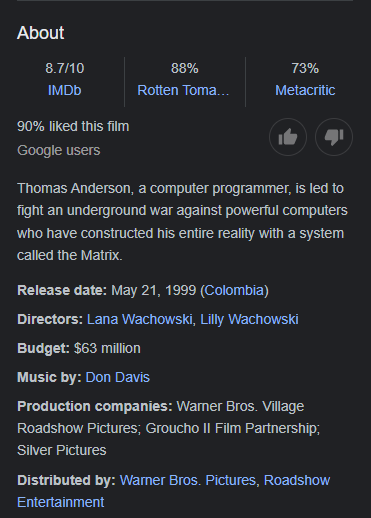

Calificaciones de *The Matrix (1999)*.

#Conclusiones

Dentro de todo este proceso pudemos resaltar algunos hechos:

* El modelo suele recomendar peliculas altamente calificadas dada la popularidada de las mismas, lo que traduce en una columna con muchas entradas no nulas.

* Aumentar la penalización dentro del algoritmo genera recomendaciones completamente aletarorias, lo que suguiere que es necesario un error al rededor del 2%

* El costo computacional del algoritmo es alto dado el volumen de datos manejados y comparaciones realizadas.

# Referencias

1.   M. Thaker. _Spotify Recommendation System_. Recuperado de: https://github.com/madhavthaker/spotify-recommendation-system
2.   D. Agarwal & B.-C. Chen.
_Statistical Methods for
Recommender Systems_. Cambridge University Press. 2016.
3.   C. Aggarwal. _Recommender Systems: The Textbook_. Springer. 2016.
4.   J. Bennett, & S. Lanning. _The Netflix Prize_. 2007.
5. Y. Koren, R. Bell & C. Volinsky, _Matrix Factorization Techniques for Recommender Systems_, in Computer, vol. 42, no. 8, pp. 30-37, Aug. 2009, doi: 10.1109/MC.2009.263.
6. _Try this at Home_. url: https://sifter.org/~simon/journal/20061211.html.
7. S. Ruder. _An overview of gradient descent optimization algorithms_. CoRR. 2016.
8. T. Landauer, P. Foltz & D. Laham. _Introduction to Latent Semantic Analysis_. Discourse Processes. 1998.
9. Li. H. *Distributed Algorithms and Optimization*. 2015. Recuperado de
http://stanford.edu/~rezab/classes/cme323/S15/notes/lec14.pdf
10. *Prototyping a Recommender System Step by Step Part 2: Alternating Least Square (ALS) Matrix Factorization in Collaborative Filtering*. Recuperado de: https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-2-alternating-least-square-als-matrix-4a76c58714a1
11. Zhou, Y., Wilkinson, D., Schreiber, R., Pan, R. (2008). *Large-Scale Parallel Collaborative Filtering for the Netflix Prize*. In: Fleischer, R., Xu, J. (eds) Algorithmic Aspects in Information and Management. AAIM 2008. Lecture Notes in Computer Science, vol 5034. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-540-68880-8_32
12. Y. Almaguer, N. Dueñas, E. Cruz & R. Yera. _Una revisión de los sistemas recomendadores grupales como herramienta innovadora en el área del turismo_. Revista de Ciencia y Tecnología. 2021.
13. K, Liao. Movie Recommender Systems. Recuperado de: https://github.com/KevinLiao159/MyDataSciencePortfolio/tree/master/movie_recommender





